In [2]:
#  Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
train_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

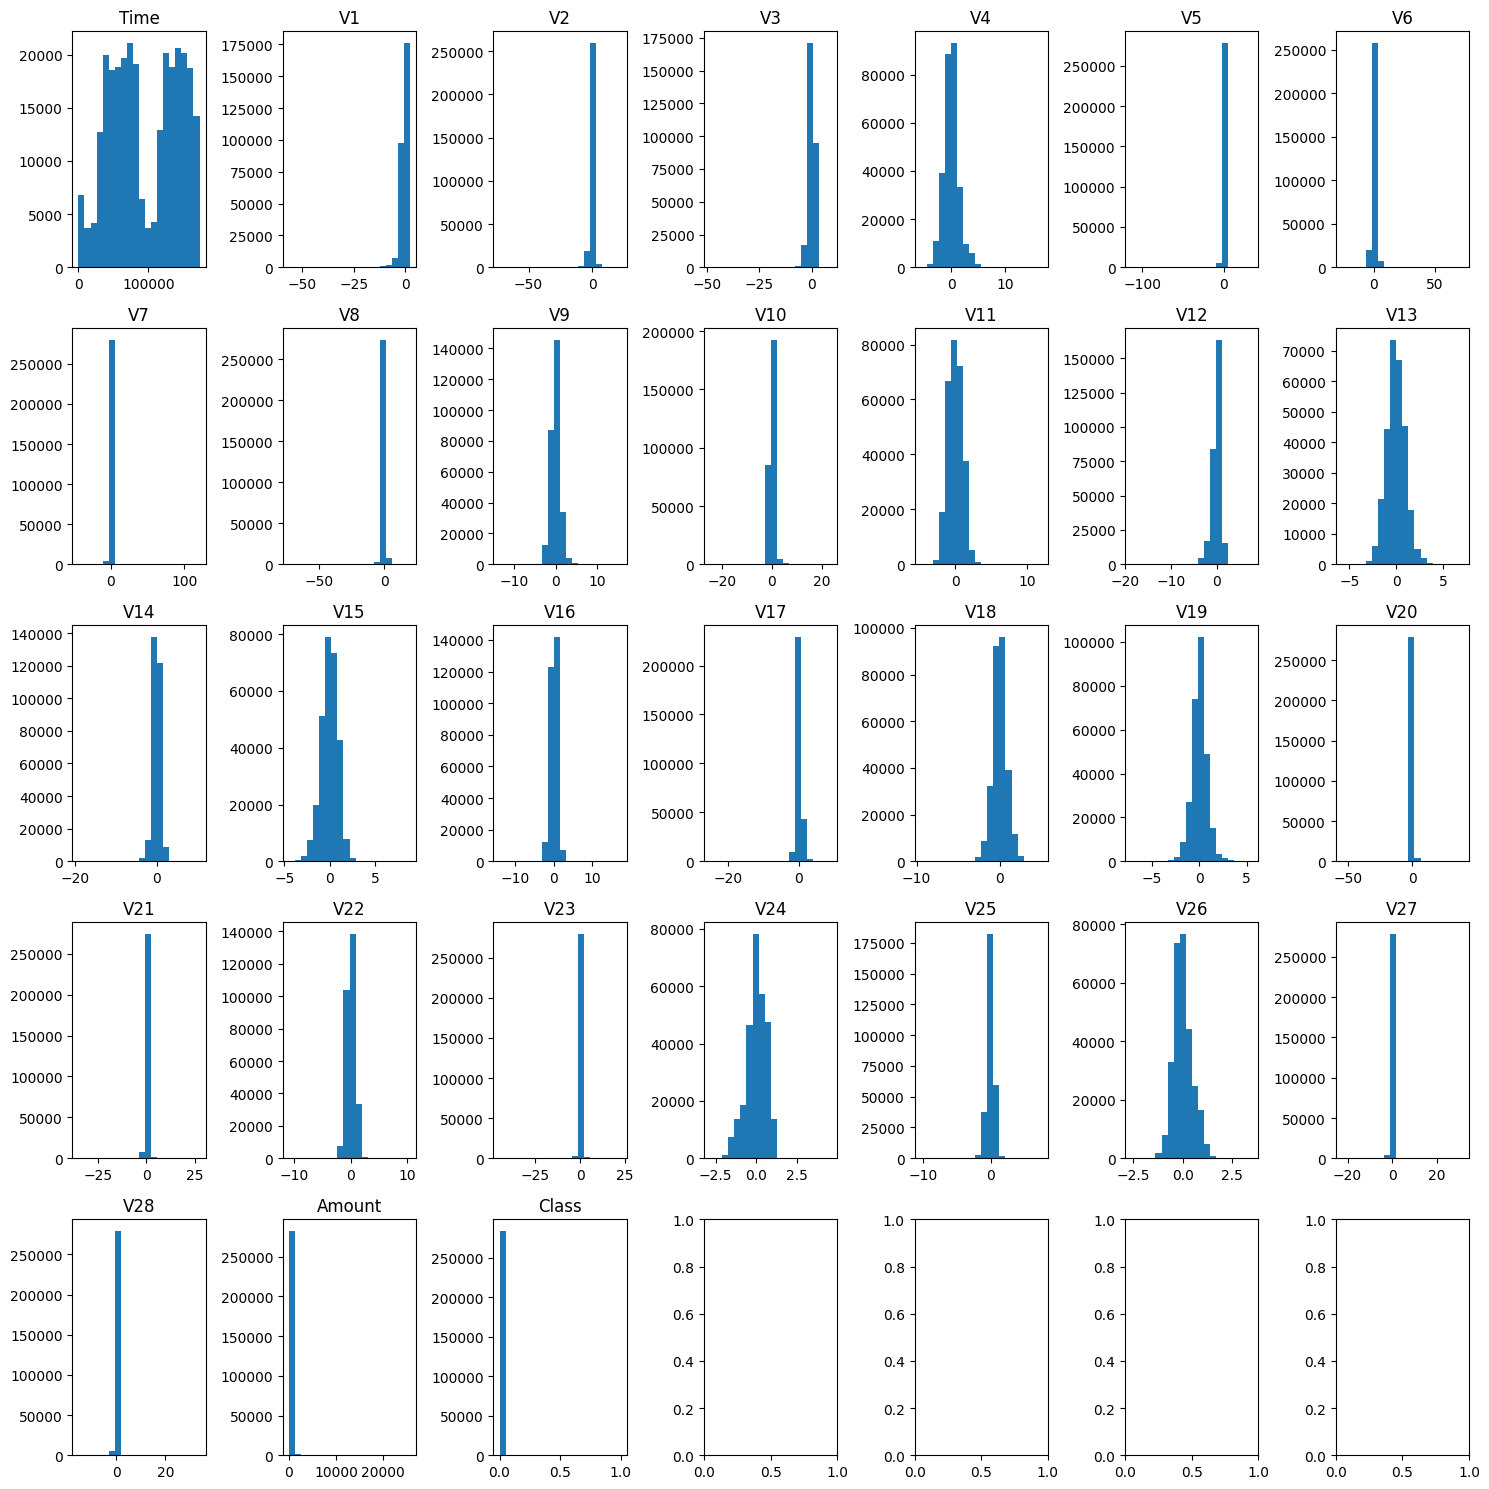

In [6]:
#the data is numerical
# no null values
# the values are standarlized
# let's visualise the features distributiton

import matplotlib.pyplot as plt

fig, ax = plt.subplots( 5 , 7 , figsize=(15 , 15) )
k = 0
for i in range(5):
    for j in range(7):
        if k < 31:
            ax[i , j].hist(train_data[train_data.columns[k]] , bins=20)
            ax[i , j].set_title(f'{train_data.columns[k]}')
        k += 1

        
plt.tight_layout()        
plt.show()

<Figure size 1000x600 with 0 Axes>

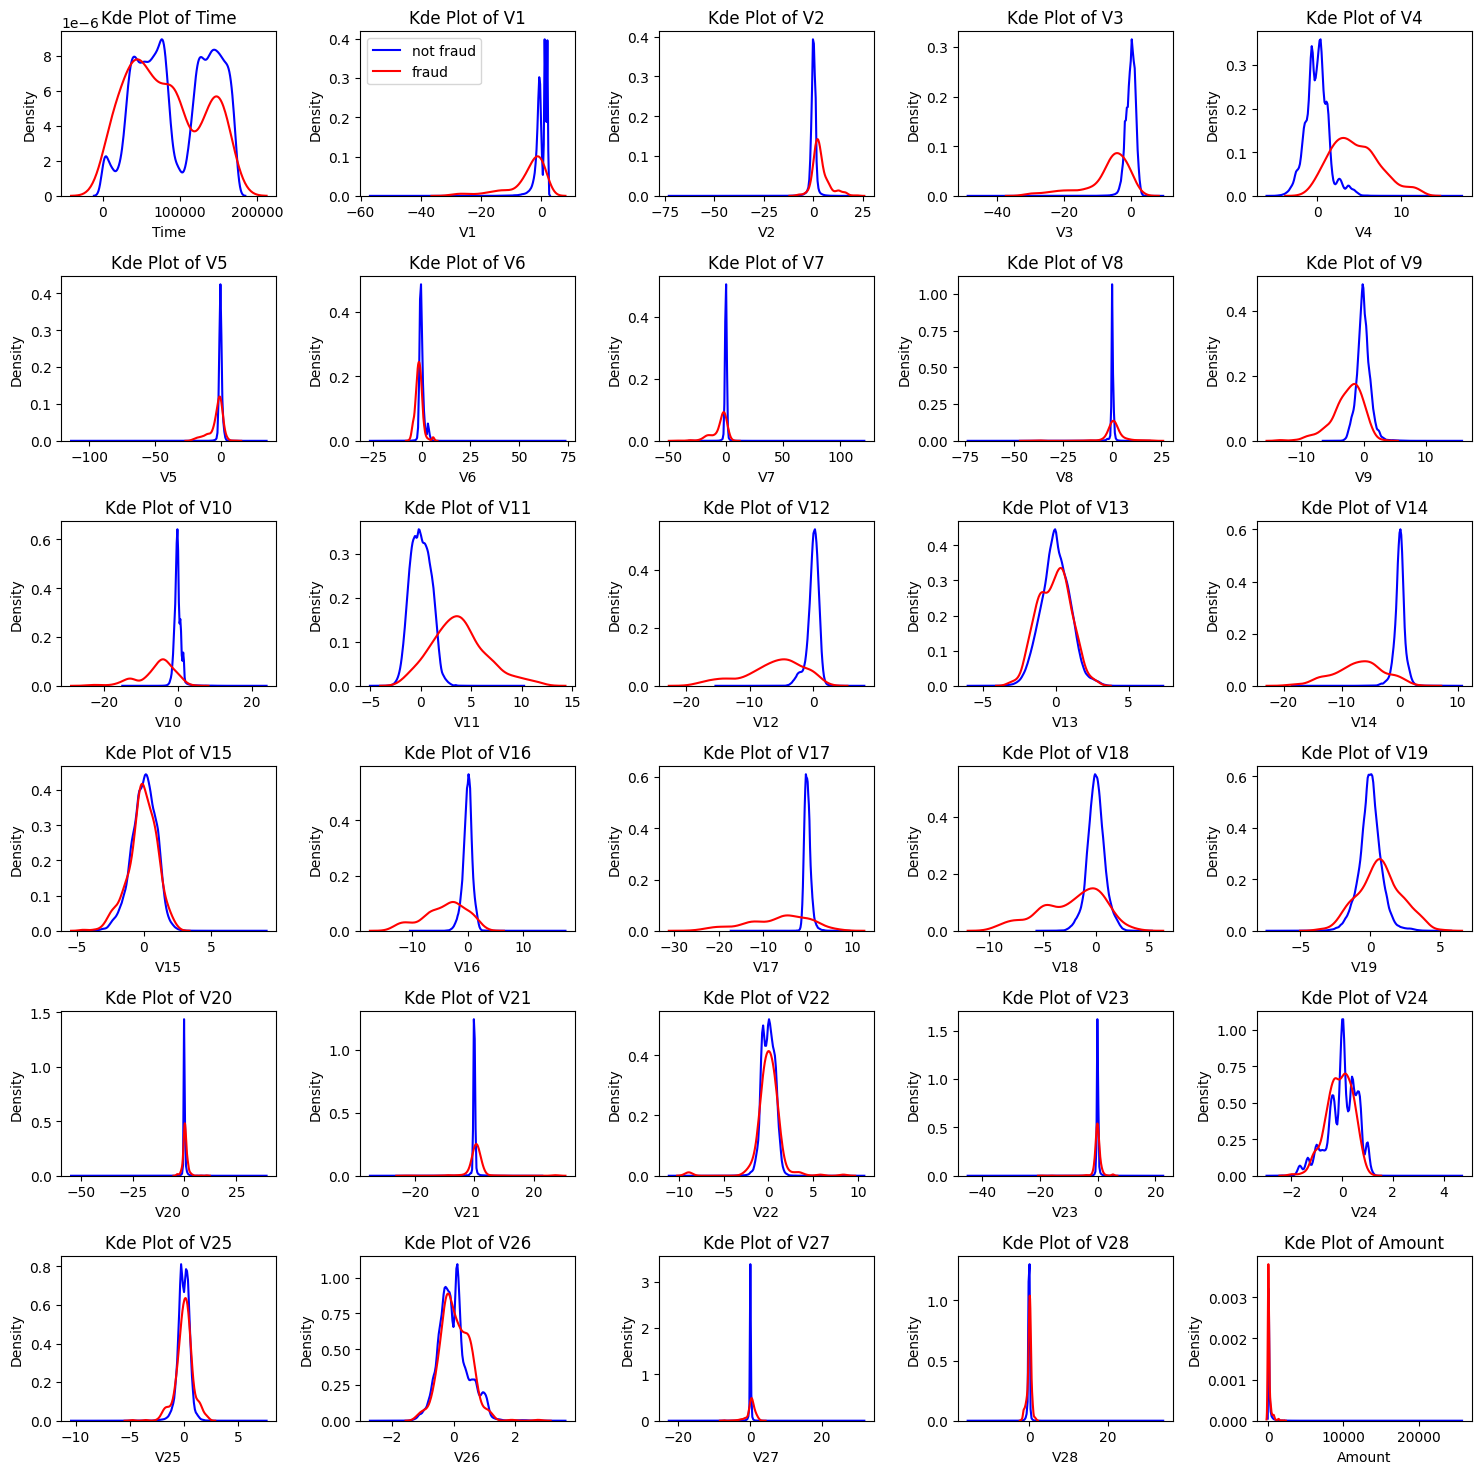

In [7]:
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(10, 6))
fig , ax = plt.subplots( 6 , 5 , figsize=(15 , 15) )
k = 0
for i in range(6):
    for j in range(5):
        sns.kdeplot(train_data[train_data['Class'] == 0][train_data.columns[k]], color='blue', label='not fraud' , ax = ax[i , j])
        sns.kdeplot(train_data[train_data['Class'] == 1][train_data.columns[k]], color='red', label='fraud' , ax = ax[i , j])
        ax[i , j].set_xlabel(f'{train_data.columns[k]}')
        ax[i , j].set_title(f'Kde Plot of {train_data.columns[k] }')
        if k == 1:  # Add legend only once to avoid overlapping
            ax[i , j].legend()
        k+=1

plt.tight_layout()        
plt.show()

In [8]:
!pip install lazypredict


<Axes: xlabel='Class', ylabel='count'>

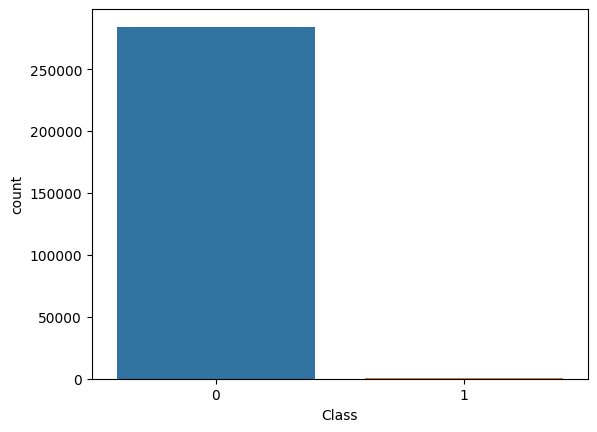

In [9]:
sns.countplot(train_data , x='Class')

In [10]:
print(f"percentage of non fraudulant card {round( train_data['Class'].value_counts()[0] / len(train_data) * 100, 2)} %")
print(f"percentage of fraudulant card {round( train_data['Class'].value_counts()[1] / len(train_data)* 100, 2)}%")

percentage of non fraudulant card 99.83 %
percentage of fraudulant card 0.17%


In [11]:
# we can see the difference between fraud and non-fraud data
# we will oversameple the data using SMOTE



In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y = train_data['Class']
X = train_data.drop(columns=['Class'])
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =48)
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_train['Time'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1,1))
X_train


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
37948,-0.338166,-0.522378,0.493349,2.453837,1.035535,-0.344889,0.913132,-0.010746,0.529415,0.466584,...,-0.194752,-0.281322,-0.421054,-0.055321,0.198183,-0.115435,-0.578237,0.138075,0.058551,-0.338166
83569,0.172122,-1.353981,0.901742,1.096012,0.865178,0.151711,-0.026978,1.723510,-0.773547,0.073113,...,-0.352448,-0.553061,-0.861201,0.373120,0.005729,-0.749040,-0.901775,-0.523355,-0.194073,0.172122
118442,-0.281919,-0.580972,1.092695,1.460067,0.084456,-0.016848,-1.186887,0.893143,-0.296609,-0.046183,...,0.303318,-0.324674,-0.644816,0.020708,0.652542,-0.178963,0.028860,0.186933,-0.047178,-0.281919
96361,0.039538,1.228930,-0.792210,-0.023620,-0.364622,-1.074241,-1.052419,-0.163738,-0.268207,-0.672631,...,-0.372599,-0.404459,-0.808588,-0.074098,0.425112,0.369662,1.084800,-0.091932,0.011998,0.039538
181303,-0.314060,1.965714,-0.414771,-0.227737,0.525047,-0.795464,-0.536786,-0.611729,-0.039616,1.467017,...,-0.227658,0.200012,0.843013,0.125850,0.012306,-0.111980,-0.210112,0.044971,-0.036785,-0.314060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180678,0.006593,1.777016,-0.876332,-0.085025,0.314807,-0.950252,0.235427,-0.993992,0.298573,1.219736,...,-0.036375,0.133174,0.237240,0.280442,0.763501,-0.650768,0.310468,-0.033038,-0.026495,0.006593
246726,-0.304940,2.039144,0.105393,-1.842122,0.214930,0.700028,-0.320424,0.127066,-0.100124,0.172908,...,-0.074588,-0.325116,-0.861363,0.264055,0.115816,-0.221810,0.174847,-0.065272,-0.041450,-0.304940
112448,0.031101,-0.805968,0.601808,1.419700,-0.464688,0.146486,-1.054529,1.256069,-0.166399,-0.642415,...,0.109926,-0.358187,-1.407489,0.297540,0.267639,-0.269332,-0.164849,-0.023088,0.111085,0.031101
220080,-0.285936,1.982459,-0.137372,-1.215847,0.281313,-0.066111,-0.972485,0.099484,-0.215531,0.394513,...,-0.222230,0.329921,1.048368,-0.006867,0.052079,0.185649,-0.122474,-0.020806,-0.065071,-0.285936


In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [14]:
print(f"percentage of non fraud data :{ round(y_train_resampled.value_counts()[0] / len(y_train_resampled)*100 , 2)}%")
print(f"percentage of fraud data :{ round(y_train_resampled.value_counts()[1] / len(y_train_resampled)*100 , 2)}%")
print(y_train_resampled.value_counts())

percentage of non fraud data :50.0%
percentage of fraud data :50.0%
Class
0    227474
1    227474
Name: count, dtype: int64


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (can also use 'val_accuracy')
    patience=5,         # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored quantity
)
model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, validation_split=0.2 , callbacks=[early_stopping])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9667 - loss: 0.0868 - val_accuracy: 0.9993 - val_loss: 0.0082
Epoch 2/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9999 - val_loss: 0.0046
Epoch 3/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9960 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 4/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9969 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 5/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9970 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 6/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9999 - val_loss: 0.0062
Epoch 7/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9975 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 8/20
11374/11374 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 

In [16]:
y_pred = model.predict(X_test)
y_pred

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [17]:
y_pred = (y_pred >= 0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

[Text(0, 0.5, ''), Text(0, 1.5, '')]

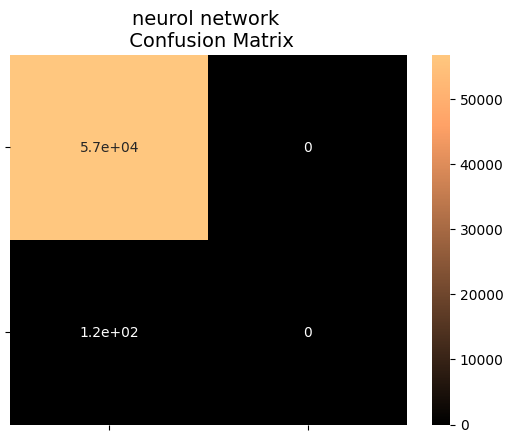

In [18]:
from sklearn.metrics import confusion_matrix
 
fig , ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.copper)
ax.set_title("neurol network \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

In [19]:
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier

# models = {
#     "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
#     "ExtraTrees": ExtraTreesClassifier(n_estimators=200, max_depth=5, min_samples_leaf=3, min_samples_split=12, random_state=42),
#     "GradientBoosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=7, random_state=42),
#     "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
#     "xgb" : XGBClassifier(n_estimators=100 , learning_rate=0.1)
# }

In [20]:
# model_scores = {}
# for name , model in models.items():
#     print(f"Evaluating {name}...")
#     model.fit(X_train, y_train)
#     holdout_score = model.score(X_test, y_test)
#     model_scores[name] = holdout_score
#     print(f"{name} Holdout Accuracy: {holdout_score:.4f}")
    
    
# best_model_name = max(model_scores, key=model_scores.get)
# best_model = models[best_model_name]
# print(f"\nBest model: {best_model_name} with Holdout Accuracy: {model_scores[best_model_name]:.4f}")  

In [21]:
# from sklearn.model_selection import RandomizedSearchCV
 
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [4, 5],
#     'min_child_weight': [1, 2],
#     'subsample': [0.7, 0.8],
#     'colsample_bytree': [0.7, 0.8],
#     'gamma': [0, 0.1]
# }
# xgb = XGBClassifier()
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=50,  # Number of random samples
#     scoring='accuracy',  # Evaluation metric
#     cv=3,  # Number of cross-validation folds
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Use all available cores
# )
# random_search.fit(X_train, y_train)
 
# print("Tuned Decision Tree Parameters: {}".format(random_search.best_params_))
# print("Best score is {}".format(random_search.best_score_))

In [22]:
# from sklearn.metrics import accuracy_score
# # best_model = random_search.best_estimator
# y_pred = best_model.predict(X_test)

# print(f'accuracy after hyper parameter tuning :{accuracy_score(y_test , y_pred)}' )

In [23]:
# import joblib

# # Save the best model from RandomizedSearchCV
# joblib.dump(best_model, 'xgb_best_model.joblib')

# # To load the model later
# loaded_model = joblib.load('xgb_best_model.joblib')